In [1]:
# Section 6.2
def some_fun(x:list):
    """Computes the length of an array using recursion

    Args:
        x (list): _description_

    Returns:
        _type_: _description_
    """
    if x == []:
        return 0
    else: 
        return 1 + some_fun(x[1:])

In [2]:
some_fun([1,2,3,4,5])

5

In [1]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
    
        pivot = array[0]
        smaller, bigger = [], []
        for ele in array[1:]:
            if ele <= pivot:
                smaller.append(ele)
            else: 
                bigger.append(ele)
    return quicksort(smaller) + [pivot] + quicksort(bigger)

In [2]:
# Test QS algorithm
quicksort([2,4,7,12,34,5])

[2, 4, 5, 7, 12, 34]

In [15]:
# import
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [28]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1775, stratify=y)

In [36]:
print(f"Label count in y: {np.bincount(y)}")
print(f"Label counts in y_train: {np.bincount(y_train)}")
print(f"Label counts in y_test: {np.bincount(y_test)}")

Label count in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [37]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1775)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1775)

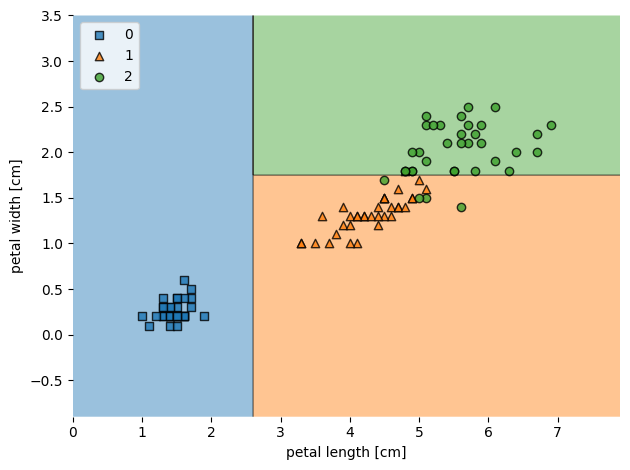

In [38]:
plot_decision_regions(X_train, y_train, tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
dot_data = export_graphviz(tree, 
                           filled=True,
                           rounded=True, 
                           class_names = ['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None 
                           )
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

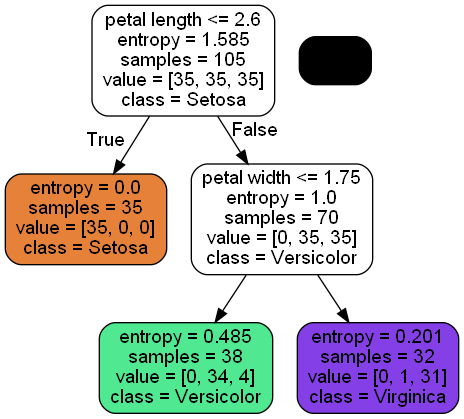

In [40]:
from IPython.display import Image
Image('tree.png')